In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing

# A Basic Exploration of Audio Data's Features
## (useful terms and their definitions)
### Tempo
Tempo is a measurement of the speed of musical compositions, normally denoted using beats per minute (BPM).

### Harmonics
Integers of the fundamental frequency. For example, the first harmonic is the lowest frequency. If we consider a plucked string, the first harmonic can be visualized as a standing wave which has a node at either end.

![harmonic_visualization](https://tghsl3physics.weebly.com/uploads/1/5/4/8/15482154/2803764.jpg?1424074599)[Figure 1](http://tghsl3physics.weebly.com/standing-waves.html)

### Spectral Centroid

Also known as center of spectral mass. The spectral centroid is a measure of the center of mass on a spectrum, and it provides insight into the brightness of a sound.

### Spectral Rolloff

The spectral rolloff point is the measured point where a percentage of the spectrum's total energy is contained below it. Typical percentages are between 85% and 95%. A lower rolloff point can indicate lower frequencies (and more bass), and a higher rolloff point can indicate higher frequencies (and more treble).[[1]](https://musicinformationretrieval.com/spectral_features.html#:~:text=Spectral%20rolloff%20is%20the%20frequency,%2C%20e.g.%2085%25%2C%20lies.)

### Mel Frequency Cepstral Coefficients (MFCCs)
MFCCs are useful in providing context based on human hearing, and in representing timbre (tone quality). The Mel Scale is based off the way humans perceive sound. The first step to developing an MFCC is converting frequency from Hertz to the Mel Scale. The log of the Mel converted frequencies is taken, and a discrete cosine transformation is used on the log's magnitude. This gives us MFCCs in the form of a spectrogram over the Mel frequencies (rather than over time).[[2]](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8)

### Zero Crossing Rate (ZCR)
ZCR is the number of times a signal transitions over zero. So the rate at which it goes from positive, to zero, to negative, or vice versa. ZCR is an indicator for noise: a higher ZCR indicates a noisier signal. [[3]](https://www.sciencedirect.com/topics/engineering/zero-crossing-rate)


### Chroma Frequencies
In western music, the musical octave has 12 distinct semitones (chroma). Analysis of chroma frequencies provides us with a visual representation based on musical notes (disregarding octave), which can help find similarities in audio. A chromogram represents the intensity of each chroma over time. [[4]](https://ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/)

# Exploratory Data Analysis (EDA)
This will be an analysis and visual exploration of the GTZAN dataset. In data science, EDA helps in discovering patterns or relationships within the data, as well as identifying errors or outlying data. [[5]](https://www.ibm.com/topics/exploratory-data-analysis)

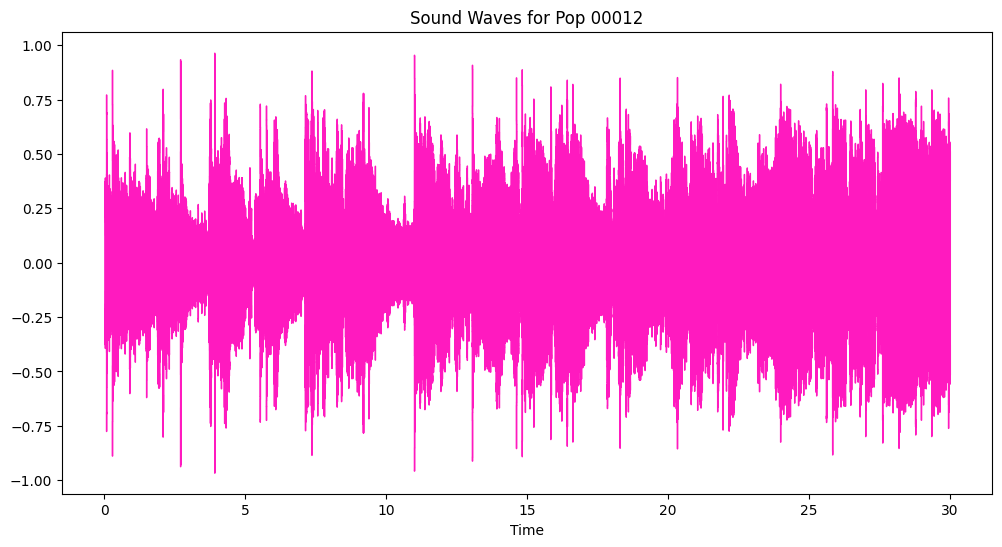

In [2]:
# displaying one of the pop genre audios
audio_file = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00012.wav'
plt.figure(figsize=(12,6))
data, sample_rate = librosa.load(audio_file)
t_data, _ = librosa.effects.trim(data) # trimming potential leading/trailing silence

librosa.display.waveshow(t_data, sr=sample_rate, color="#FF1ABF")
plt.title("Sound Waves for Pop 00012", fontsize=12)
ipd.Audio(audio_file)

In [3]:
print("Audio File Data: ", t_data)
print("Sample Rate: ", sample_rate)

Audio File Data:  [ 0.16629028  0.19113159  0.19692993 ... -0.2711792  -0.40167236
 -0.372406  ]
Sample Rate:  22050


Above, we can see a visual representation of the sound waves for the Pop 00012 audio file, as well as play the audio. Using librosa, we have also gained the audio's normalized set of data and its sample rate. Some useful aspects of the librosa package are that, as mentioned, it normalizes the data for us, and it also takes the sample rate of any audio file and tries to convert it to 22050 Hz. The sample rate is the number of samples taken per second of a particular audio. A higher sample rate indicates better quality audio.[[6]](https://www.adobe.com/uk/creativecloud/video/discover/audio-sampling.html)

Text(0.5, 1.0, 'Fourier Transform on Pop 00012')

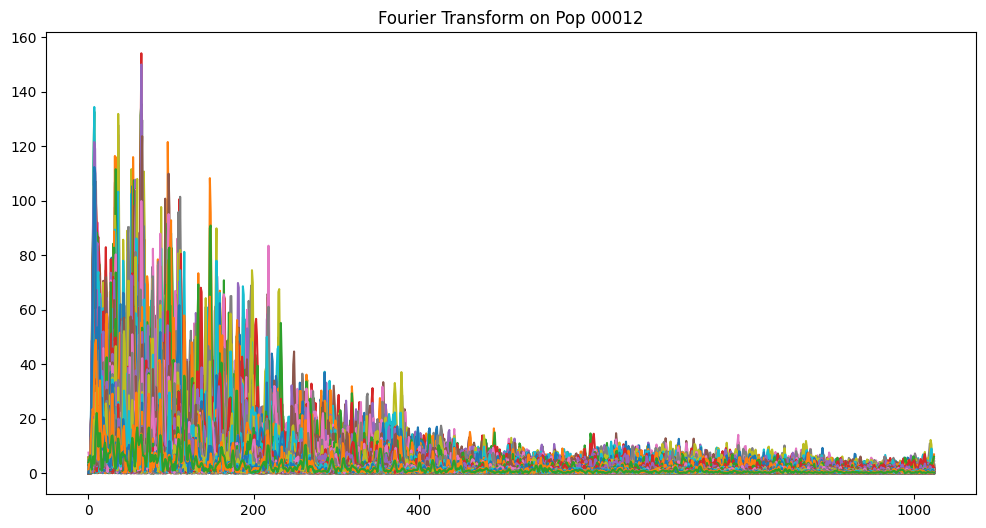

In [4]:
# Fourier Transform, looking at frequencies
n_fft = 2048
hop_length = 512
decomp = np.abs(librosa.stft(t_data, n_fft=n_fft, hop_length=hop_length))

plt.figure(figsize=(12, 6))
plt.plot(decomp)
plt.title("Fourier Transform on Pop 00012", fontsize=12)

The fourier transform is important because it allows us to analyze waves in a frequency domain. All waveforms are a sum of simple sinusoids of different frequencies, and the fourier transform provides us with the decomposition of a waveform into its sinusoidal components.[[7]](https://www.thefouriertransform.com/#introduction)

Text(0.5, 1.0, 'Spectrogram of Pop 00012')

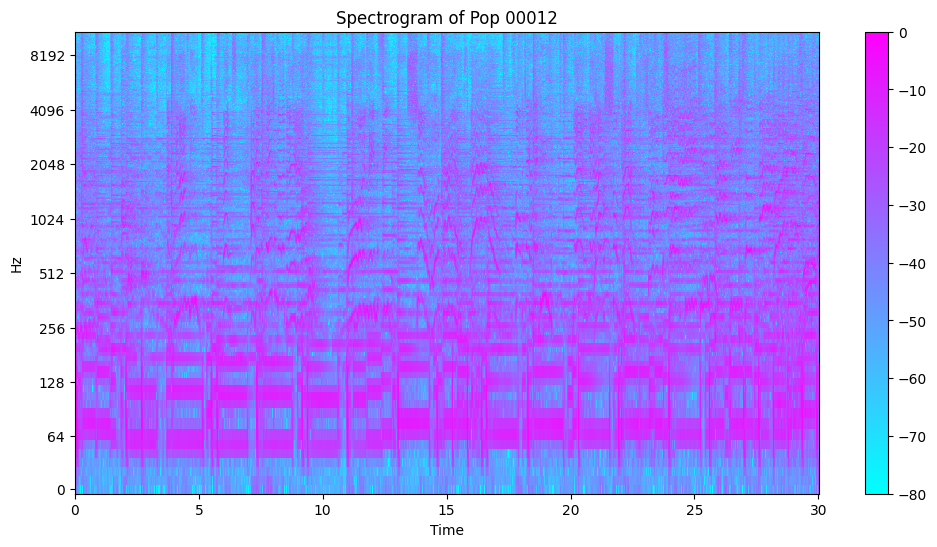

In [5]:
# Spectrogram, looking at frequencies over time
db_spec = librosa.amplitude_to_db(decomp, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(db_spec, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram of Pop 00012", fontsize=12)

A spectrogram provides us with a spectrum of an audio's frequencies over time. This is where some previously discussed features (such as spectral centroid) can be analyzed.

Text(0.5, 1.0, 'Chromagram of Pop 00012')

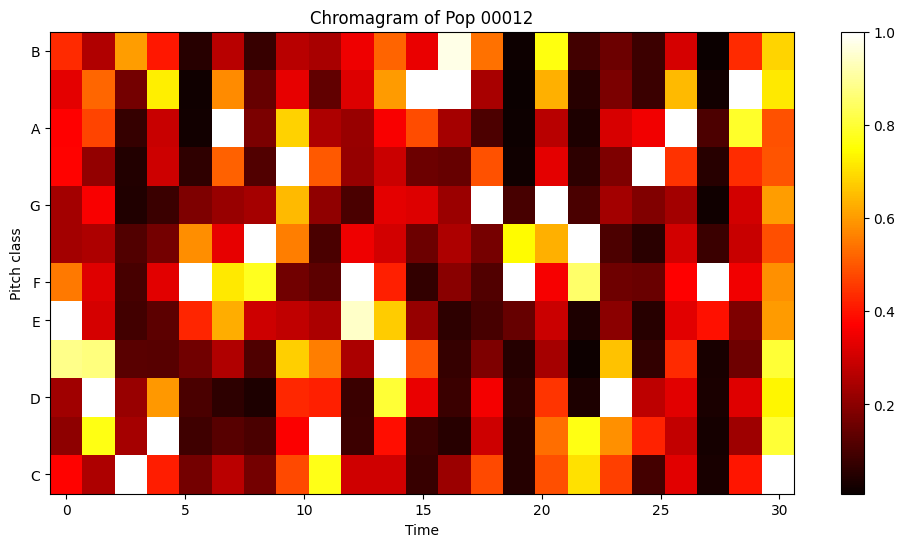

In [6]:
# Chromagram, looking at chroma intensity over time
chromagram = librosa.feature.chroma_stft(y=data, sr=sample_rate, hop_length=30000)

plt.figure(figsize=(12, 6))
librosa.display.specshow(chromagram, sr=sample_rate, hop_length=30000, x_axis='time', y_axis='chroma', cmap='hot');
plt.colorbar();
plt.title("Chromagram of Pop 00012", fontsize=12)

Text(0.5, 1.0, 'Mel Spectrogram of Pop 00012')

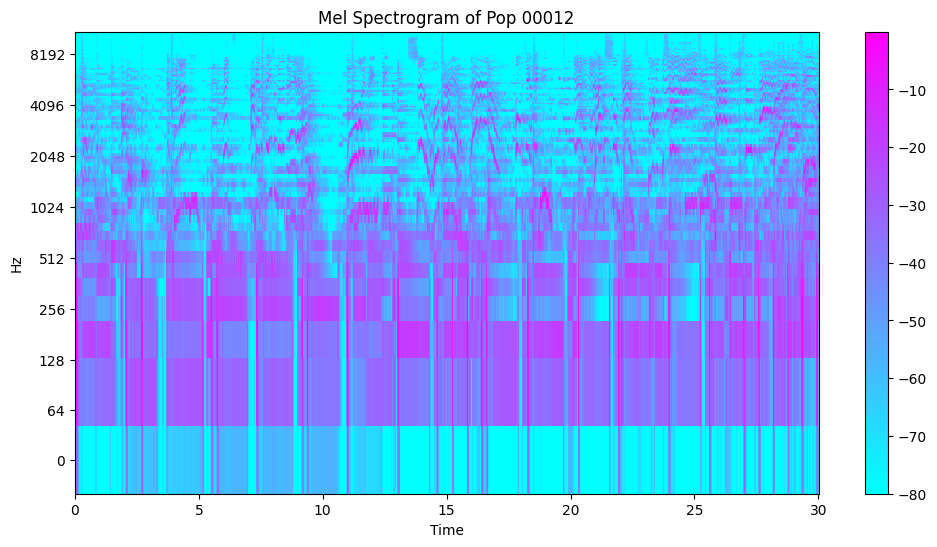

In [7]:
# Mel Spectrogram, looking at Mel frequencies over time
mel_S = librosa.feature.melspectrogram(y=data, sr=sample_rate)
mel_db = librosa.amplitude_to_db(mel_S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool');
plt.colorbar();
plt.title("Mel Spectrogram of Pop 00012", fontsize=12)

This Mel spectrogram shows us Mel frequencies over time. This is useful as the Mel Scale provides human-hearing based context.

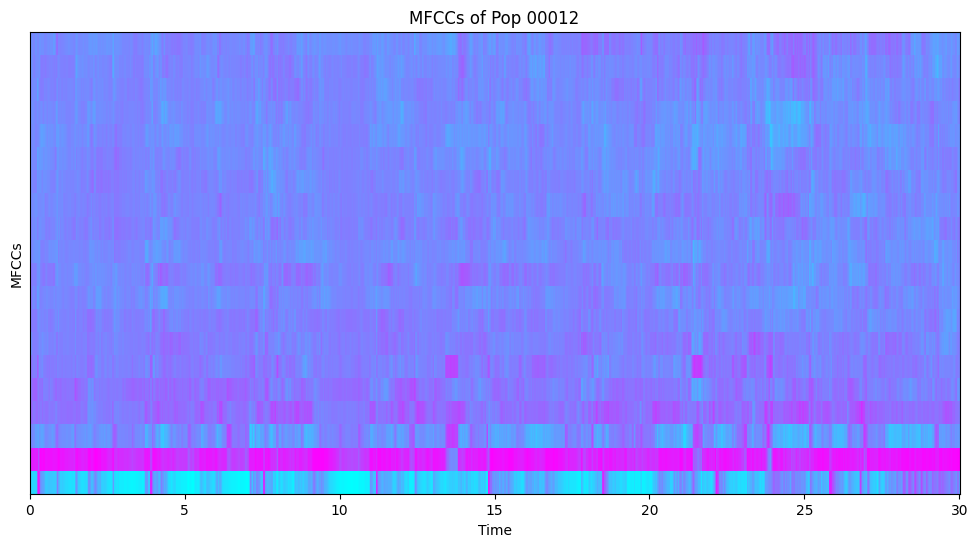

In [8]:
# Displaying MFCCs
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate)
mfccs = sklearn.preprocessing.StandardScaler().fit_transform(mfccs)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', cmap='cool');
plt.ylabel("MFCCs");
plt.title("MFCCs of Pop 00012", fontsize=12);

As discussed earlier, MFCCs are a crucial feature in analyzing audio data. Above is a visual representation (spectrogram) of MFCCs for an audio file.

**We will now do analysis of the GTZAN dataset's features** using a heatmap and a boxplot. The heatmap will show us correlations between features (we can see which are closely related), and the boxplot will provide us with an understanding of how our data is spread out for each label.

In [9]:
# reading csv
ds = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")
ds.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


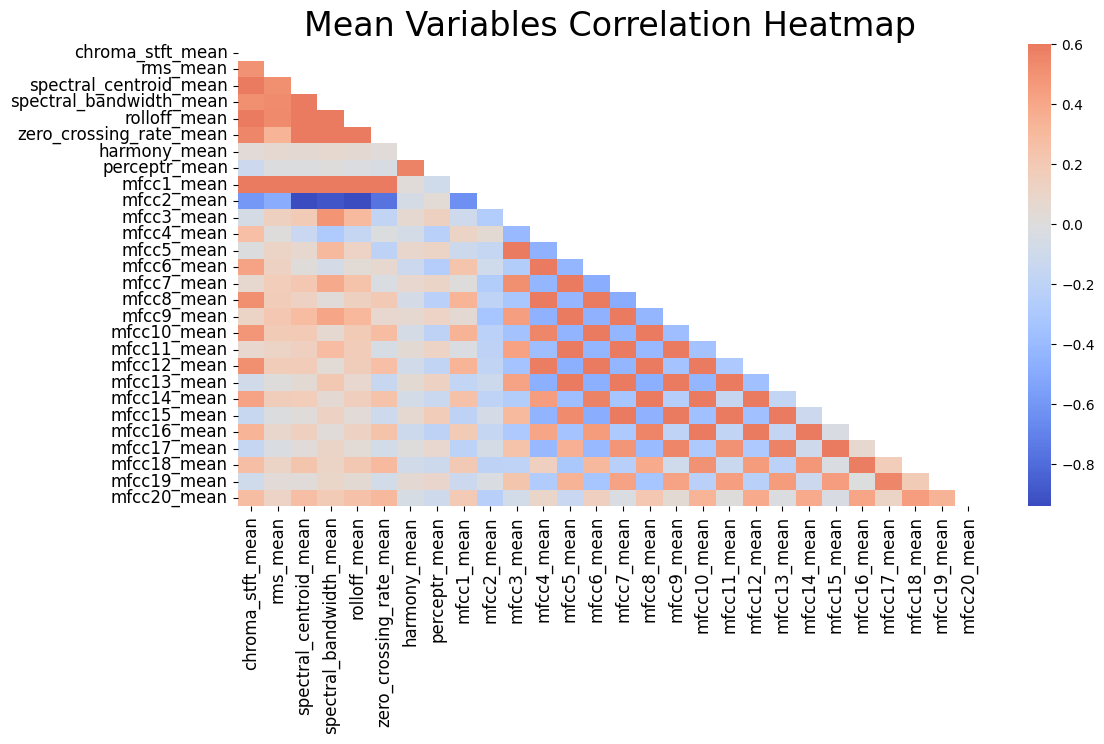

In [10]:
# mean variables correlation heatmap
cols = [col for col in ds.columns if 'mean' in col]
corr = ds[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 6));
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.6, center=0)
plt.title("Mean Variables Correlation Heatmap", fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

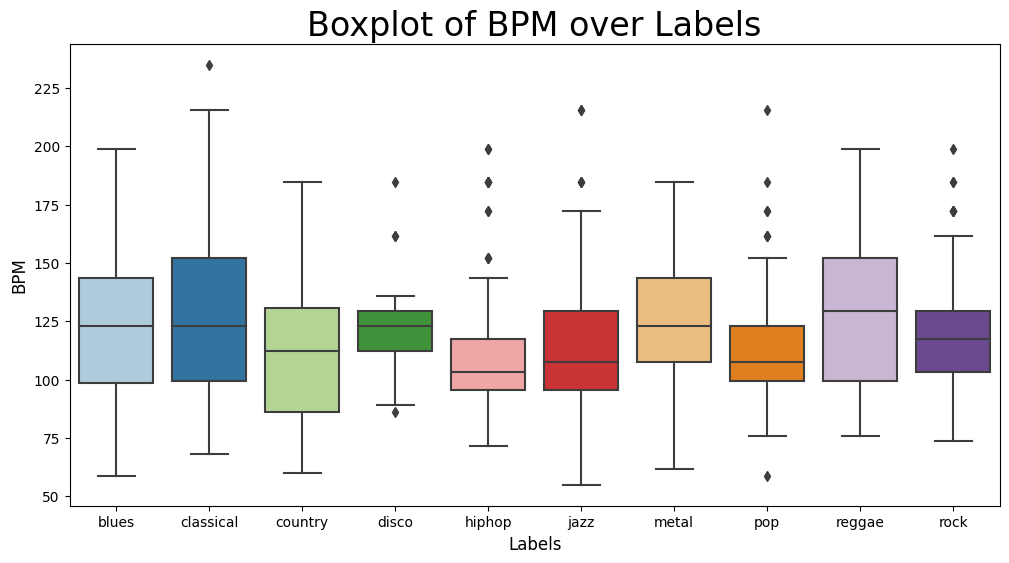

In [11]:
# BPM over labels boxplot
plot_data = ds[["label", "tempo"]]

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="tempo", data=plot_data, palette='Paired')
plt.title("Boxplot of BPM over Labels", fontsize=24)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("BPM", fontsize=12);

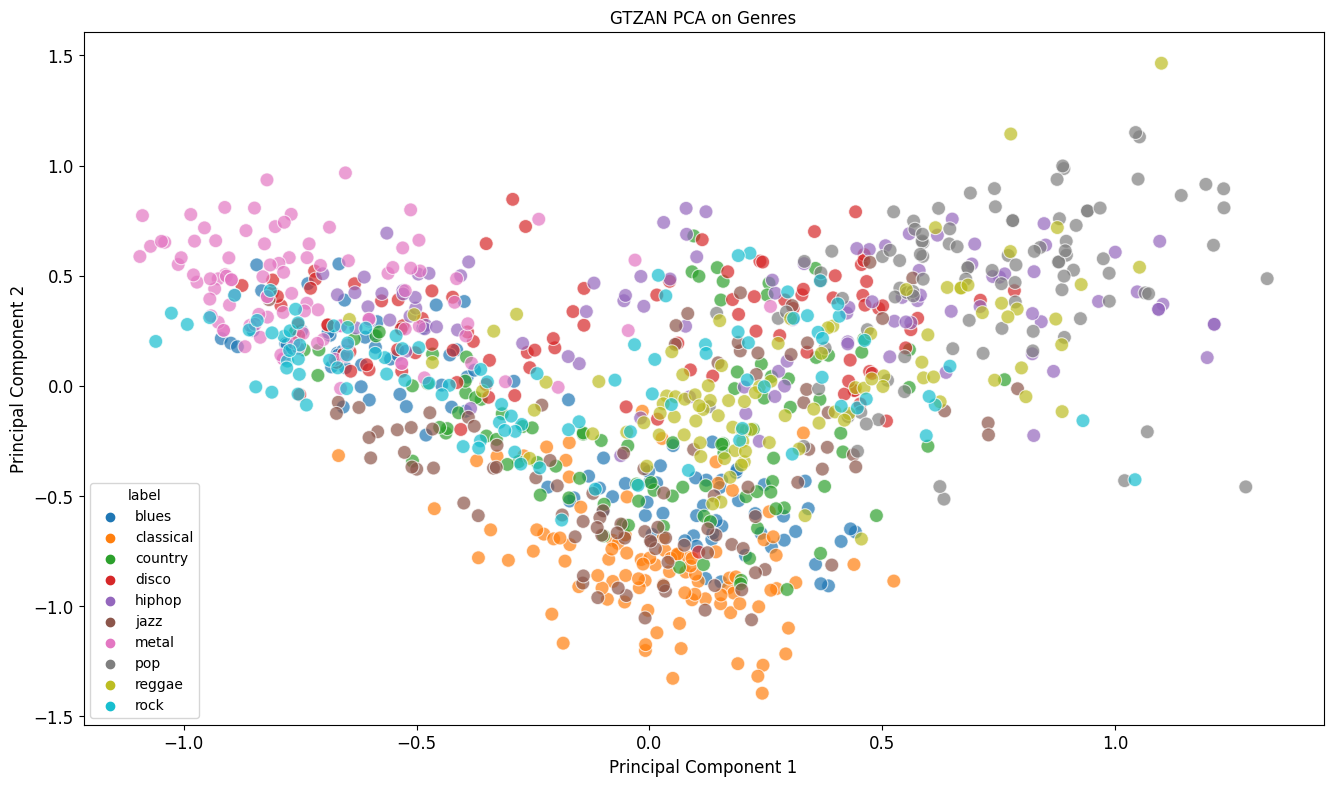

In [12]:
ds = ds.iloc[0:,1:]
y = ds['label']
X = ds.loc[:,ds.columns!='label']
columns = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=columns)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, y], axis=1)
plt.figure(figsize=(16, 9))
sns.scatterplot(x="PC1", y="PC2", data=finalDf, hue="label", alpha=0.7, s=100);

plt.title("GTZAN PCA on Genres", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.savefig("PCA Scattert.jpg")

# Sources
\[1\]: https://musicinformationretrieval.com/spectral_features.html#:~:text=Spectral%20rolloff%20is%20the%20frequency,%2C%20e.g.%2085%25%2C%20lies.

\[2\]: https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8

\[3\]: https://www.sciencedirect.com/topics/engineering/zero-crossing-rate

\[4\]: https://ee.columbia.edu/~dpwe/resources/matlab/chroma-ansyn/

\[5\]: https://www.ibm.com/topics/exploratory-data-analysis

\[6\]: https://www.adobe.com/uk/creativecloud/video/discover/audio-sampling.html

\[7\]: https://www.thefouriertransform.com/#introduction

\[Figure 1\]: http://tghsl3physics.weebly.com/standing-waves.html